# Python Notebook Presentation for the Dataviz Module

The following is a dummy example of the notebook presentation required for the Part A of the module. This gives a basic guide to the structure your presentation should take. 

## Table of Contents

* [Data Wrangling](#data-wrangling)
    * [Initial analysis of the data](#data-analysis)
    * [Cleaning the data](#data-cleaning)
* [Exploring the Data](#data-exploring)
* [Presenting the Data](#data-presenting)
    * [Selected static charts](#static-charts)
    * [Plotly charts](#plotly-charts)
* [Conclusion](#conclusion)

For a large notebook, it's useful to have a table of contents. This can easily be achieved by using a hyperlink `a` tag placed by a Markdown section:

```
## Data Wrangling <a class="anchor" id="data-wrangling"></a>
```

You can link to this in the table of contents with an internal hyperlink:

```
* [Data Wrangling](#data-wrangling)
```

## Data Wrangling <a class="anchor" id="data-wrangling"></a>

The first thing to do in any Jupyter notebook is import the main libraries we'll be using. Pandas and Matplotlib are the usal go-tos but the chart library seaborn adds some very useful specialized charts and, arguably, looks a lot better than Matplotlib's defaults. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now we will load our Brexit dataset into a Pandas dataframe, reading it from a csv file. We also turn off Panda's default max_columns display option, which limits the columns shown on output - we want to be able to see them all. 

In [3]:
df = pd.read_csv("data/brexit_full.csv")
pd.options.display.max_columns = None

### Initial analysis of the data <a class="anchor" id="data-analysis"></a>

In this section you do a quick appraisal of the dataset, describing its basic structure and points of interest. What sort of data are we looking at - is it categorical, temporal, geographical etc.. What kind of questions does it suggest asking, what routes might we follow in our iterative exploration to come?

Let's use the `head` method to look at the top five rows of our dataframe

In [4]:
df.head()

,Area_Code,Area,Region_Code,Region,Valid_Votes,Remain,Leave,Pct_Remain,Pct_Leave,Leave? (derived cell),Urban / Rural,% degree educated and higher,% 18+ in FTE,% non-British,% identifying as white,% identifying as non-white (derived cell),Median Age,% Unemployed,GVA 2015,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,E06000001,Hartlepool,E12000001,North East,46100,14029,32071,30.43,69.57,Leave,Predominantly Urban,17.6,3.2,2.17%,97.6,2.4,41.8,4.7,15777,NaN,Rural local authorities,Leave,77.0
1,E06000002,Middlesbrough,E12000001,North East,61358,21181,40177,34.52,65.48,Leave,Predominantly Urban,18.5,7.6,7.19%,88.1,11.9,36.4,4.7,18540,NaN,NaN,Remain,14.0
2,E06000003,Redcar and Cleveland,E12000001,North East,72714,24586,48128,33.81,66.19,Leave,Urban with Significant Rural,18.9,3.0,0.75%,98.5,1.5,44.7,3.8,15188,NaN,Mixed local authorities,Leave,43.0
3,E06000004,Stockton-on-Tees,E12000001,North East,100415,38433,61982,38.27,61.73,Leave,Predominantly Urban,22.8,4.4,3.13%,94.5,5.5,40.3,3.1,20257,NaN,NaN,Remain,11.0
4,E06000005,Darlington,E12000001,North East,55166,24172,30994,43.82,56.18,Leave,Predominantly Urban,23.7,2.6,5.77%,95.9,4.1,42.7,3.1,24585,NaN,Urban local authorities,Leave,126.0


We're interested in comparing the different London boroughs so let's filter the dataframe for London regions and save that as as `df_london` dataframe

In [5]:
df_london = df[df.Region == "London"].copy()

In [6]:
df_london

,Area_Code,Area,Region_Code,Region,Valid_Votes,Remain,Leave,Pct_Remain,Pct_Leave,Leave? (derived cell),Urban / Rural,% degree educated and higher,% 18+ in FTE,% non-British,% identifying as white,% identifying as non-white (derived cell),Median Age,% Unemployed,GVA 2015,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
293,E09000001,City of London,E12000007,London,4399,3312,1087,75.29,24.71,Remain,Predominantly Urban,68.4,6.2,32.93%,78.6,21.4,38.7,0.9,5333112,NaN,NaN,NaN,NaN
294,E09000002,Barking and Dagenham,E12000007,London,73880,27750,46130,37.56,62.44,Leave,Predominantly Urban,20.9,7.2,22.44%,58.2,41.8,32.1,2.5,16514,NaN,NaN,NaN,NaN
295,E09000003,Barnet,E12000007,London,161033,100210,60823,62.23,37.77,Remain,Predominantly Urban,40.3,7.3,23.36%,64.1,35.9,36.3,1.5,24760,NaN,NaN,NaN,NaN
296,E09000004,Bexley,E12000007,London,128489,47603,80886,37.05,62.95,Leave,Predominantly Urban,21.8,4.5,11.16%,81.6,18.4,38.6,1.3,21255,NaN,NaN,NaN,NaN
297,E09000005,Brent,E12000007,London,121404,72523,48881,59.74,40.26,Remain,Predominantly Urban,33.3,9.1,32.00%,36.2,63.8,34.6,2.3,24630,NaN,NaN,NaN,NaN
298,E09000006,Bromley,E12000007,London,182432,92398,90034,50.65,49.35,Remain,Predominantly Urban,33.1,3.4,12.04%,84.1,15.9,40.5,1.0,21907,NaN,NaN,NaN,NaN
299,E09000007,Camden,E12000007,London,95133,71295,23838,74.94,25.06,Remain,Predominantly Urban,50.5,13.6,23.97%,66.2,33.8,34.0,1.6,109694,NaN,NaN,NaN,NaN
300,E09000008,Croydon,E12000007,London,171134,92913,78221,54.29,45.71,Remain,Predominantly Urban,31.8,5.9,18.21%,55.0,45.0,36.8,1.6,19481,NaN,NaN,NaN,NaN
301,E09000009,Ealing,E12000007,London,149041,90024,59017,60.40,39.60,Remain,Predominantly Urban,37.0,7.6,32.94%,48.9,51.1,35.9,2.2,26465,NaN,NaN,NaN,NaN
302,E09000010,Enfield,E12000007,London,136906,76425,60481,55.82,44.18,Remain,Predominantly Urban,28.7,7.0,19.45%,60.9,39.1,35.5,2.2,20091,NaN,NaN,NaN,NaN


### Cleaning the dataset <a class="anchor" id="data-exploration"></a>

In this section you would look for any discrepancies in the dataset, e.g. time based columns stored as Numpy objects, and remove/sanitize them. For example you might convert dates stored as time strings ("1/19/20") into datetime columns, which can be manipulated  by Pandas. So, for example, you could easily get the time difference in days between two dates. 

## Exploring the dataset <a class="anchor" id="data-exploration"></a>

In this section you iteratively explore the dataset, looking for points of interest, meaningful correlations etc. This exploration is driven initally by the questions posed in the initial [data analysis](#data-analysis) 

Let's create a vertical barchart showing Remain and Leave numbers by London Area. 

<AxesSubplot:ylabel='Area'>

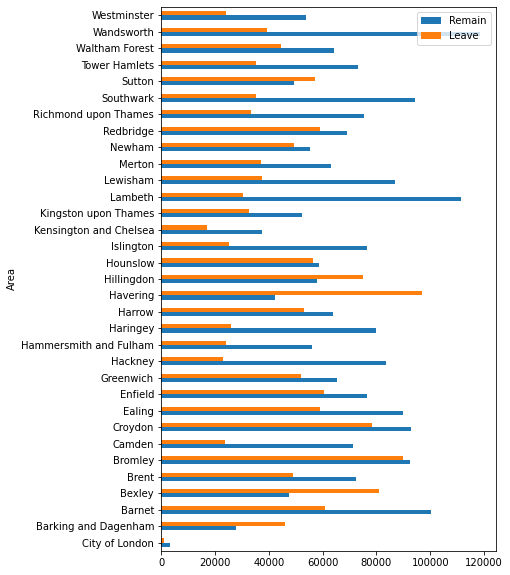

In [7]:
df_london.plot(x="Area", y=["Remain", "Leave"], kind="barh", figsize=(6, 10), sort_columns=True)

Let's use the `sort_values` method to sort the Area names alphabetically so that they read from top to bottom:

<AxesSubplot:ylabel='Area'>

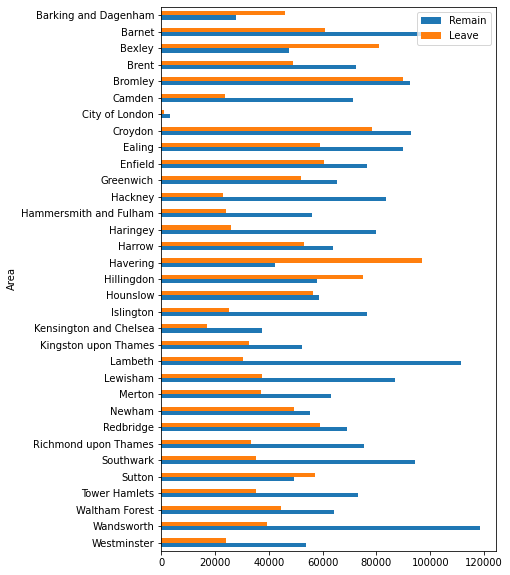

In [8]:
df_london.sort_values(by="Area", ascending=False).plot(x="Area", y=["Remain", "Leave"], kind="barh", figsize=(6, 10), sort_columns=True)

These grouped bars show clearly that London voted predominantly to stay in the EU. 

Now let's see if we can find any correlation between the age of the voters and their voting intentions. A scatter-plot of median age for the area against the percentage voting leave should clarify:

<AxesSubplot:xlabel='Median Age', ylabel='Pct_Leave'>

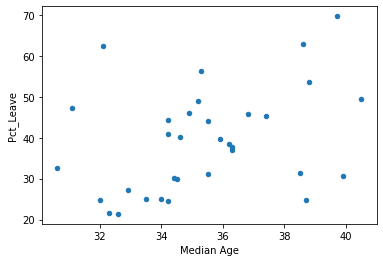

In [9]:
df_london.plot(x="Median Age", y="Pct_Leave", kind="scatter")

That looks like a correlation - let's use Seaborns `regplot` to superimpose a line regression with error bars:

<AxesSubplot:xlabel='Median Age', ylabel='Pct_Leave'>

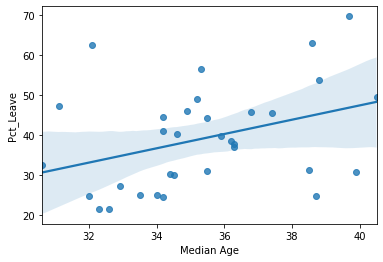

In [10]:
sns.regplot(x='Median Age', y='Pct_Leave', data=df_london)

<AxesSubplot:xlabel='% Unemployed', ylabel='Pct_Leave'>

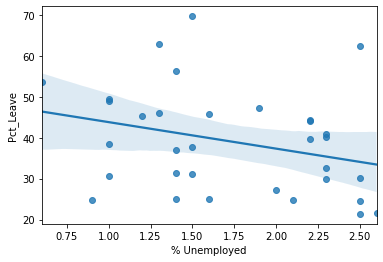

In [11]:
sns.regplot(x="% Unemployed", y="Pct_Leave", data=df_london)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

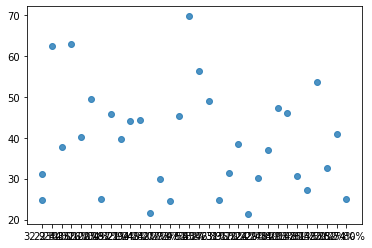

In [12]:
sns.regplot(x="% non-British", y="Pct_Leave", data=df_london)

Oops - a unclean data alert!! Explain what went wrong and what you will do to fix it. 

In [13]:
list(df_london["% non-British"])

['32.93%',
 '22.44%',
 '23.36%',
 '11.16%',
 '32.00%',
 '12.04%',
 '23.97%',
 '18.21%',
 '32.94%',
 '19.45%',
 '24.82%',
 '24.07%',
 '27.93%',
 '27.47%',
 '29.55%',
 '6.43%',
 '18.46%',
 '27.31%',
 '23.35%',
 '39.10%',
 '17.24%',
 '22.29%',
 '22.48%',
 '27.80%',
 '34.93%',
 '21.48%',
 '15.31%',
 '26.45%',
 '15.50%',
 '22.82%',
 '25.74%',
 '25.80%',
 '32.93%']

In [14]:
def convert_dodgy_number(x):
    try:
        x = float(str(x)[:-1])
    except:
        x = pd.NaT
    return x

In [15]:
df_london["% non-British"].apply(convert_dodgy_number)

293    32.93
294    22.44
295    23.36
296    11.16
297    32.00
298    12.04
299    23.97
300    18.21
301    32.94
302    19.45
303    24.82
304    24.07
305    27.93
306    27.47
307    29.55
308     6.43
309    18.46
310    27.31
311    23.35
312    39.10
313    17.24
314    22.29
315    22.48
316    27.80
317    34.93
318    21.48
319    15.31
320    26.45
321    15.50
322    22.82
323    25.74
324    25.80
325    32.93
Name: % non-British, dtype: float64

In [16]:
df_london["% non-British"] = df_london["% non-British"].apply(convert_dodgy_number)

In [17]:
# an alternative way to change the column values with added flexibility to specify rows
#df_london.loc[:,'% non-British'] = df_london['% non-British'].apply(convert_dodgy_number)

In [18]:
df_london

,Area_Code,Area,Region_Code,Region,Valid_Votes,Remain,Leave,Pct_Remain,Pct_Leave,Leave? (derived cell),Urban / Rural,% degree educated and higher,% 18+ in FTE,% non-British,% identifying as white,% identifying as non-white (derived cell),Median Age,% Unemployed,GVA 2015,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
293,E09000001,City of London,E12000007,London,4399,3312,1087,75.29,24.71,Remain,Predominantly Urban,68.4,6.2,32.93,78.6,21.4,38.7,0.9,5333112,NaN,NaN,NaN,NaN
294,E09000002,Barking and Dagenham,E12000007,London,73880,27750,46130,37.56,62.44,Leave,Predominantly Urban,20.9,7.2,22.44,58.2,41.8,32.1,2.5,16514,NaN,NaN,NaN,NaN
295,E09000003,Barnet,E12000007,London,161033,100210,60823,62.23,37.77,Remain,Predominantly Urban,40.3,7.3,23.36,64.1,35.9,36.3,1.5,24760,NaN,NaN,NaN,NaN
296,E09000004,Bexley,E12000007,London,128489,47603,80886,37.05,62.95,Leave,Predominantly Urban,21.8,4.5,11.16,81.6,18.4,38.6,1.3,21255,NaN,NaN,NaN,NaN
297,E09000005,Brent,E12000007,London,121404,72523,48881,59.74,40.26,Remain,Predominantly Urban,33.3,9.1,32.00,36.2,63.8,34.6,2.3,24630,NaN,NaN,NaN,NaN
298,E09000006,Bromley,E12000007,London,182432,92398,90034,50.65,49.35,Remain,Predominantly Urban,33.1,3.4,12.04,84.1,15.9,40.5,1.0,21907,NaN,NaN,NaN,NaN
299,E09000007,Camden,E12000007,London,95133,71295,23838,74.94,25.06,Remain,Predominantly Urban,50.5,13.6,23.97,66.2,33.8,34.0,1.6,109694,NaN,NaN,NaN,NaN
300,E09000008,Croydon,E12000007,London,171134,92913,78221,54.29,45.71,Remain,Predominantly Urban,31.8,5.9,18.21,55.0,45.0,36.8,1.6,19481,NaN,NaN,NaN,NaN
301,E09000009,Ealing,E12000007,London,149041,90024,59017,60.40,39.60,Remain,Predominantly Urban,37.0,7.6,32.94,48.9,51.1,35.9,2.2,26465,NaN,NaN,NaN,NaN
302,E09000010,Enfield,E12000007,London,136906,76425,60481,55.82,44.18,Remain,Predominantly Urban,28.7,7.0,19.45,60.9,39.1,35.5,2.2,20091,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='% non-British', ylabel='Pct_Leave'>

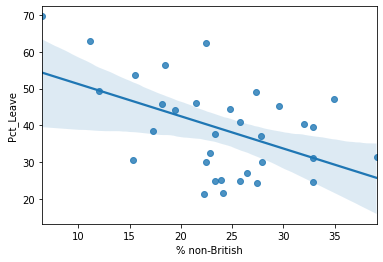

In [19]:
sns.regplot(x="% non-British", y="Pct_Leave", data=df_london)

## Presenting the Data <a class="anchor" id="data-wrangling"></a>

In this section you pick some of the charts/visualizations produced during the exploration phase to produce a web presentation. These can be static images (pngs) produced by Matplotlib's `savefig` method, or some embeddable Plotly charts, which support user interaction.  

### A selection of static charts <a class="anchor" id="static-charts"></a>

Here you would show off your selection of static charts, produced during the exploratory phase. You will probably refine these charts for presentation, improving labelling, font sizes etc. 


### Some Plotly charts <a class="anchor" id="plotly-charts"></a>


If you need the added power of Plotly or some of Plotly's specialized charts, here is where you would present them. Plotly excells at things like maps and offers the possibility of user interactions, which provide opportunities to let your user explore the data themselves. 

In [20]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

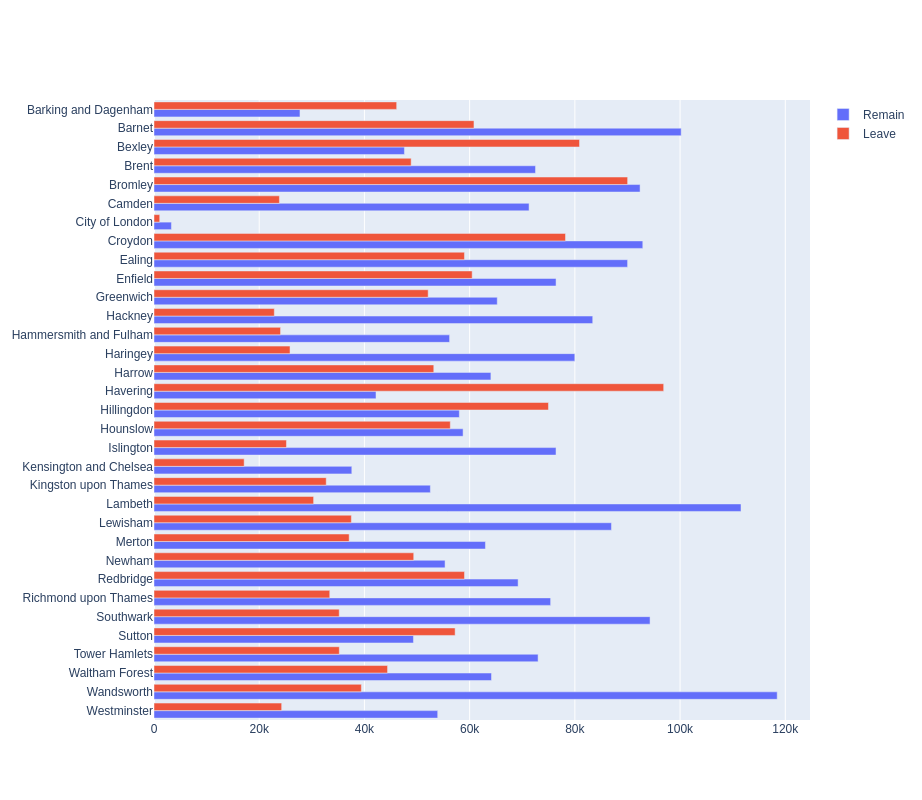

In [21]:
df_london = df_london.sort_values(by="Area", ascending=False)

remain = go.Bar(y=df_london["Area"], x=df_london["Remain"], orientation="h", name="Remain")
leave = go.Bar(y=df_london["Area"], x=df_london["Leave"], orientation="h", name="Leave")

layout = go.Layout(
    barmode='group',
    width=600,
    height=800,
    margin=dict(l=150)
)

fig = go.Figure(data=[remain, leave], layout=layout)
iplot(fig, filename='brexit-grouped-bar')

We can embed that Ploty chart in our web presentation by using the `plot` function to produce a string containing all the necessary JavaScript, HTML and data. 

In [22]:
embed_string = plot(fig, output_type='div', include_plotlyjs="cdn")

By printing this we get a string which can be cut and pasted into a web-page to produce an on-line chart. It's a good idea to separate the elements of the chart as shown in the module lectures. 

In [23]:
print(embed_string)

<div>                        <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>                <div id="3fc4c9b7-cdd8-4354-b139-f59e5d29a994" class="plotly-graph-div" style="height:800px; width:600px;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("3fc4c9b7-cdd8-4354-b139-f59e5d29a994")) {                    Plotly.newPlot(                        "3fc4c9b7-cdd8-4354-b139-f59e5d29a994",                        [{"name": "Remain", "orientation": "h", "type": "bar", "x": [53928, 118463, 64156, 73011, 49319, 94293, 75396, 69213, 55328, 63003, 86955, 111584, 52533, 37601, 76420, 58755, 58040, 42201, 64042, 79991, 56188, 83398, 65248, 76425, 90024, 92913, 3312, 71295, 92398, 72523, 47603, 100210, 27750], "y": ["Westminster", "Wandsworth", "Walt

## Conclusion <a class="anchor" id="conclusion"></a>

A short conclusion explaining such things as:

- How the presentation was developed, which stories were discovered.
- What you had to do to tame the data.
- Any surprises you discovered in the dataset etc. 
- The central story you were able to tell.